In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
%matplotlib inline
iris = datasets.load_iris()

In [3]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width', 'Petal_Length','Petal_width']
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
y

,Targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [5]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(X)
from scipy.stats import mode
labels = np.zeros_like(clusters)

E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
for i in range(3) : 
    cat = (clusters == i) 
    labels[cat] = mode(iris.target[cat] )[0] 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13468\3488167509.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[cat] = mode(iris.target[cat] )[0]


Accuracy =  0.8866666666666667


Text(0, 0.5, 'Petal width')

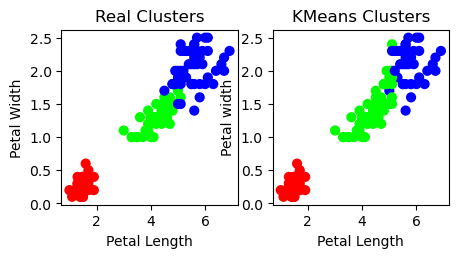

In [7]:
acc = accuracy_score(iris.target, labels)
print('Accuracy = ',acc)
plt.figure(figsize = (5,5))
colormap = np.array(['red', 'lime', 'blue'])
plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_width, c = colormap[y.Targets],s = 40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_width, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
xs = pd. DataFrame(scaled_X,columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture (n_components = 3)
gmm_y = gmm.fit_predict(xs)
labels = np.zeros_like(clusters)

E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
for i in range(3):
    cat = (gmm_y == i)
    labels [cat] = mode (iris.target[cat])[0]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13468\3583304174.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels [cat] = mode (iris.target[cat])[0]


Accuracy using GMM =  0.9666666666666667


Text(0, 0.5, 'Petal Width')

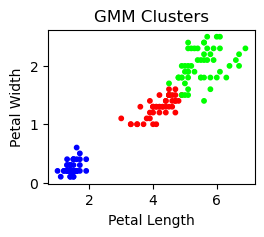

In [10]:
acc = accuracy_score(iris.target,labels)
print("Accuracy using GMM = " ,acc)
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_width,c = colormap[gmm_y],s = 10)
plt.subplots_adjust(hspace = 0.4,wspace = 0.4)
plt.title('GMM Clusters') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')